![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

We have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use our insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided us with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [1]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


In [2]:
# Calculate the frequency of crimes per hour
crimes['TIME OCC'] = pd.to_datetime(crimes['TIME OCC'], format='%H%M', errors='coerce')
crimes['hour'] = crimes['TIME OCC'].dt.hour
crime_frequency_per_hour = crimes['hour'].value_counts()

# Find the hour with the highest frequency of crimes
peak_crime_hour = crime_frequency_per_hour.idxmax()
print("Hour with the highest frequency of crimes:", peak_crime_hour)

Hour with the highest frequency of crimes: 12


In [3]:
# Calculate the frequency of night crimes per area
night_crimes = crimes[(crimes['hour'] >= 22) | (crimes['hour'] < 4)]
night_crime_frequency_per_area = night_crimes['AREA NAME'].value_counts()
# Find the area with the largest frequency of night crimes
peak_night_crime_location = night_crime_frequency_per_area.idxmax()
print("Area with the largest frequency of night crimes:", peak_night_crime_location)

Area with the largest frequency of night crimes: Central


In [4]:
# Create bins and labels for victim age ranges
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Add a new column using pd.cut() to bin values into discrete intervals
crimes["Age Bracket"] = pd.cut(crimes["Vict Age"],
                               bins=age_bins,
                               labels=age_labels)

# Find the category with the largest frequency
victim_ages = crimes["Age Bracket"].value_counts()
# Display the results
print("Number of crimes committed against victims by age group:")
print(victim_ages)

Number of crimes committed against victims by age group:
Age Bracket
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: count, dtype: int64


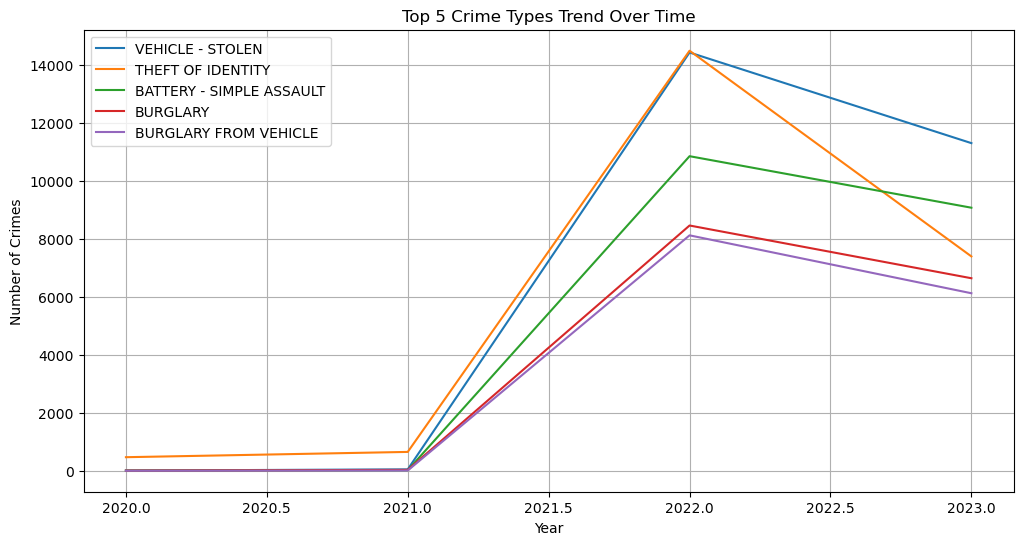

In [5]:
# Group the data by crime description and year to calculate the frequency of each crime type over time
crime_trends = crimes.groupby([crimes['DATE OCC'].dt.year, 'Crm Cd Desc']).size().unstack(fill_value=0)

# Find the top 5 most frequent crime types
top_5_crime_types = crime_trends.sum().nlargest(5).index

# Plot the trends for the top 5 crime types
plt.figure(figsize=(12, 6))
for crime_type in top_5_crime_types:
    plt.plot(crime_trends.index, crime_trends[crime_type], label=crime_type)

plt.title('Top 5 Crime Types Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend()
plt.grid(True)
plt.show()

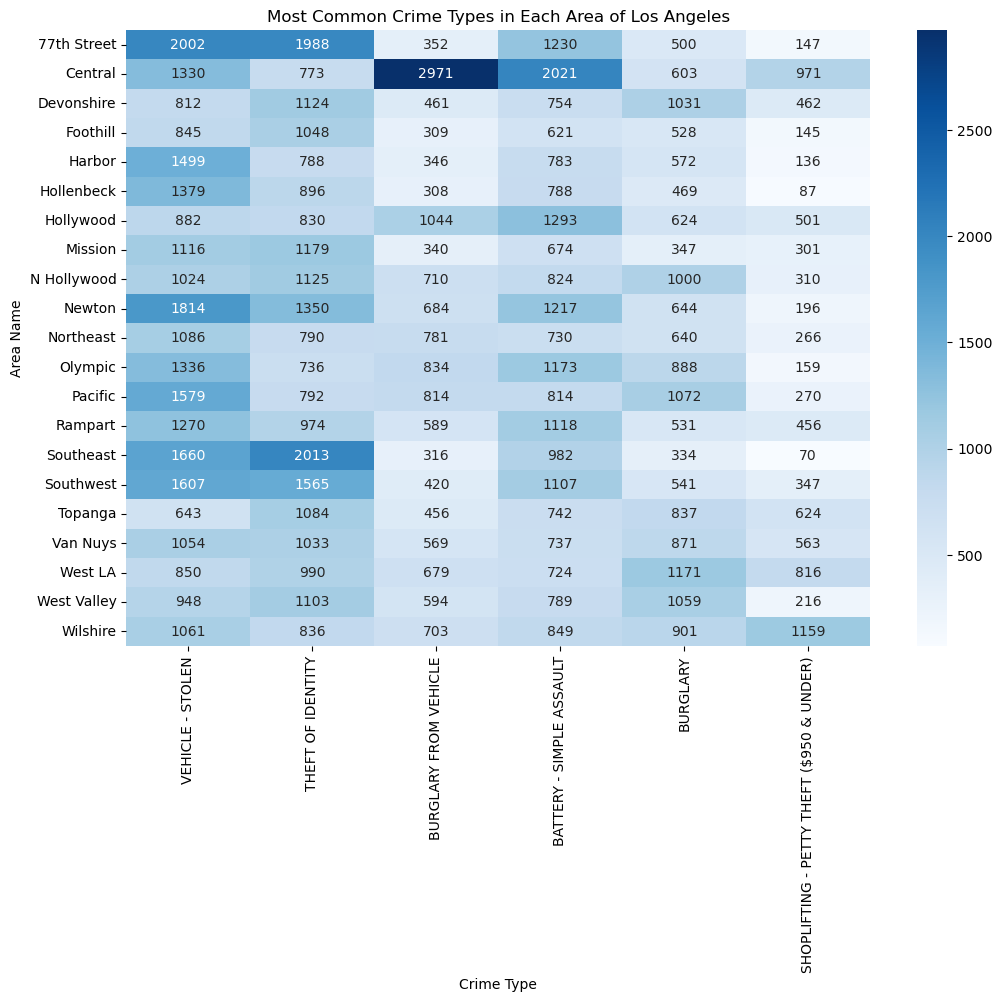

In [6]:
# Group the data by both area name and crime description and calculate the frequency of each crime type in each area
crime_types_by_area = crimes.groupby(['AREA NAME', 'Crm Cd Desc']).size().unstack(fill_value=0)

# Find the most common crime types in each area
top_crime_types_by_area = crime_types_by_area.idxmax(axis=1)

# Plot the most common crime types in each area
plt.figure(figsize=(12, 8))
sns.heatmap(crime_types_by_area[top_crime_types_by_area.value_counts().index[:10]], cmap='Blues', annot=True, fmt='d')
plt.title('Most Common Crime Types in Each Area of Los Angeles')
plt.xlabel('Crime Type')
plt.ylabel('Area Name')
plt.show()